In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

supermarket_df = pd.read_csv("完整数据.csv"
                             ,encoding="Windows-1252")
print(supermarket_df.isnull().sum())
# 邮编缺失值过多，删除
supermarket_df.drop(columns="Postal Code", axis=0, inplace=True)

supermarket_df["Order Date"] = pd.to_datetime(supermarket_df["Order Date"], format="mixed")
supermarket_df["Ship Date"] = pd.to_datetime(supermarket_df["Ship Date"], format="mixed")
supermarket_df

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Row ID         Order ID Order Date  Ship Date       Ship Mode  \
0       42433     AG-2011-2040 2011-01-01 2011-06-01  Standard Class   
1       22253    IN-2011-47883 2011-01-01 2011-08-01  Standard Class   
2       48883     HU-2011-1220 2011-01-01 2011-05-01    Second Class   
3       11731  IT-2011-3647632 2011-01-01 2011-05-01    Second Class   
4       22255    IN-2011-47883 2011-01-01 2011-08-01  Standard Class   
...       ...              ...        ...        ...             ...   
51285   32593   CA-2014-115427 2014-12-31 2015-04-01  Standard Class   
51286   47594     MO-2014-2560 2014-12-31 2015-05-01  Standard Class   
51287    8857   MX-2014-110527 2014-12-31 2015-02-01    Second Class   
51288    6852   MX-2014-114783 2014-12-31 2015-06-01  Standard Class   
51289   36388   CA-2014-156720 2014-12-31 2015-04-01  Standard Class   

      Customer ID     Customer Name      Segment         City  \
0        TB-11280   Toby Braunhardt     Consumer  Constantine   
1        JH-15985       Joseph Holt     Consumer  Wagga Wagga   
2          AT-735     Annie Thurman     Consumer     Budapest   
3        EM-14140      Eugene Moren  Home Office    Stockholm   
4        JH-15985       Joseph Holt     Consumer  Wagga Wagga   
...           ...               ...          ...          ...   
51285    EB-13975        Erica Bern    Corporate    Fairfield   
51286     LP-7095         Liz Preis     Consumer       Agadir   
51287    CM-12190  Charlotte Melton     Consumer      Managua   
51288    TD-20995     Tamara Dahlen     Consumer       Juárez   
51289    JM-15580     Jill Matthias     Consumer     Loveland   

                  State  ...        Product ID         Category Sub-Category  \
0           Constantine  ...  OFF-TEN-10000025  Office Supplies      Storage   
1       New South Wales  ...   OFF-SU-10000618  Office Supplies     Supplies   
2              Budapest  ...  OFF-TEN-10001585  Office Supplies      Storage   
3             Stockholm  ...   OFF-PA-10001492  Office Supplies        Paper   
4       New South Wales  ...   FUR-FU-10003447        Furniture  Furnishings   
...                 ...  ...               ...              ...          ...   
51285        California  ...   OFF-BI-10002103  Office Supplies      Binders   
51286  Souss-Massa-Draâ  ...  OFF-WIL-10001069  Office Supplies      Binders   
51287           Managua  ...   OFF-LA-10004182  Office Supplies       Labels   
51288         Chihuahua  ...   OFF-LA-10000413  Office Supplies       Labels   
51289          Colorado  ...   OFF-FA-10003472  Office Supplies    Fasteners   

                                          Product Name    Sales Quantity  \
0                                  Tenex Lockers, Blue  408.300        2   
1                             Acme Trimmer, High Speed  120.366        3   
2                              Tenex Box, Single Width   66.120        4   
3                          Enermax Note Cards, Premium   44.865        3   
4                           Eldon Light Bulb, Duo Pack  113.670        5   
...                                                ...      ...      ...   
51285  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   13.904        2   
51286          Wilson Jones Hole Reinforcements, Clear    3.990        1   
51287           Hon Color Coded Labels, 5000 Label Set   26.400        3   
51288           Hon Legal Exhibit Labels, Alphabetical    7.120        1   
51289                              Bagged Rubber Bands    3.024        3   

      Discount    Profit  Shipping Cost  Order Priority  
0          0.0  106.1400          35.46          Medium  
1          0.1   36.0360           9.72          Medium  
2          0.0   29.6400           8.17            High  
3          0.5  -26.0550           4.82            High  
4          0.1   37.7700           4.70          Medium  
...        ...       ...            ...             ...  
51285      0.2    4.5188           0.89          Medium  
51286      0.0    0.420

In [6]:
%pip install statsmodels
%pip install joblib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 训练前预处理

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
import numpy as np

# 按月份分开

sales_total = supermarket_df.set_index(pd.DatetimeIndex(supermarket_df["Order Date"]))
sales_total = sales_total.groupby(pd.Grouper(freq='MS'))["Sales"].sum()

sales_total.index.freq = "MS"
sales_total

Order Date
2011-01-01    138241.30042
2011-02-01    134969.94086
2011-03-01    171455.59372
2011-04-01    128833.47034
2011-05-01    148146.72092
2011-06-01    189338.43966
2011-07-01    162034.69756
2011-08-01    219223.49524
2011-09-01    255237.89698
2011-10-01    204675.07846
2011-11-01    214934.29386
2011-12-01    292359.96752
2012-01-01    162800.89338
2012-02-01    152661.15144
2012-03-01    201608.72784
2012-04-01    187469.96192
2012-05-01    218960.16042
2012-06-01    249289.77172
2012-07-01    174394.02808
2012-08-01    271669.66086
2012-09-01    256567.85308
2012-10-01    239321.09904
2012-11-01    270723.05356
2012-12-01    291972.33306
2013-01-01    206459.19582
2013-02-01    191062.77216
2013-03-01    230547.79468
2013-04-01    233181.34844
2013-05-01    304509.96336
2013-06-01    341162.34370
2013-07-01    223642.65664
2013-08-01    323876.60716
2013-09-01    326897.27044
2013-10-01    270121.87570
2013-11-01    383039.21248
2013-12-01    371245.40880
2014-01-01    268

## 检查加法模型/乘法模型

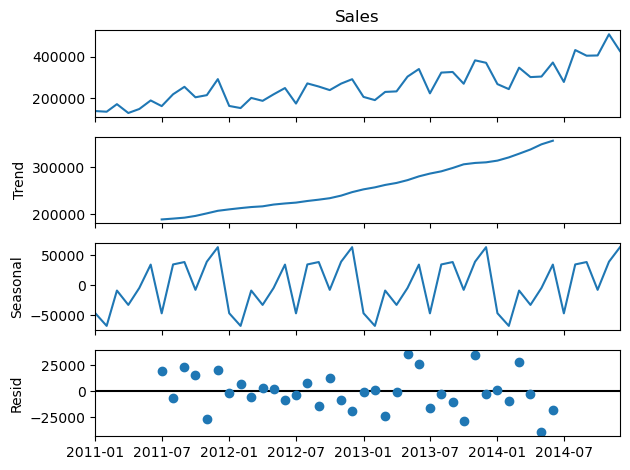

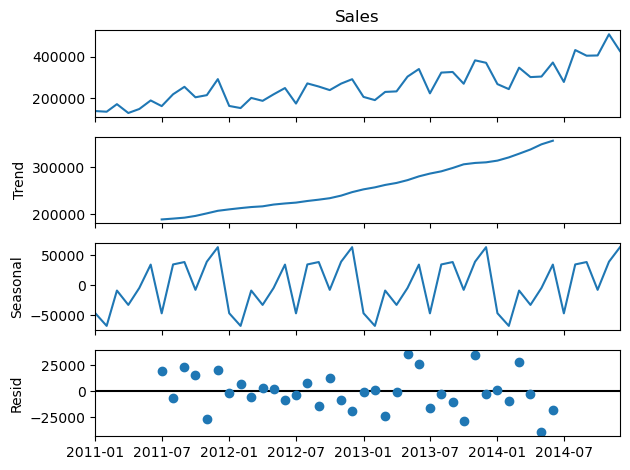

In [8]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose

add_results = seasonal_decompose(sales_total, model="additive")
mul_results = seasonal_decompose(sales_total, model="multipliative")
add_results.plot()


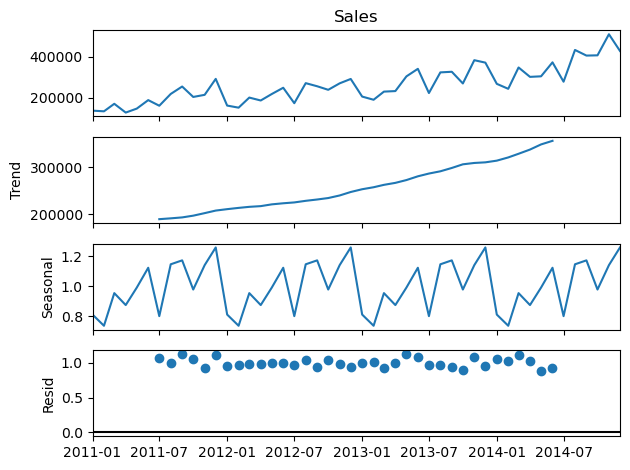

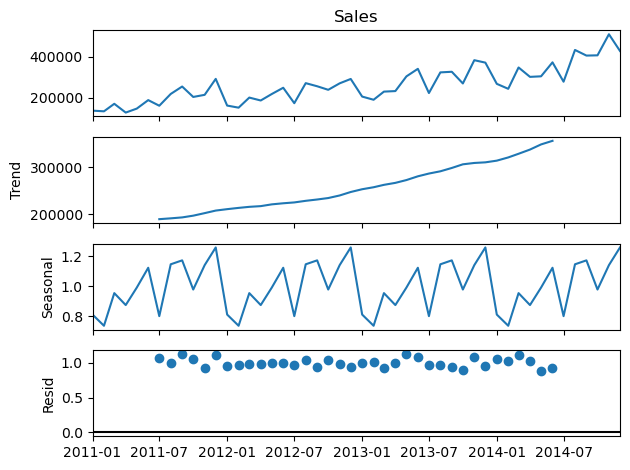

In [9]:
mul_results.plot()

In [10]:
add_resid = add_results.resid.dropna()
mul_resid = mul_results.resid.dropna()
add_acf_total = np.sum(np.square(acf(add_resid)))
mul_acf_total = np.sum(np.square(acf(mul_resid)))
add_acf_total, mul_acf_total, add_acf_total < mul_acf_total

(1.3325077202425215, 1.2540181752744441, False)

## 随机网格搜索

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm_joblib import tqdm_joblib
import random
import warnings
from multiprocessing import cpu_count, Pool
from joblib import Parallel
from joblib import delayed

warnings.filterwarnings('ignore')
# 网格搜索
params = {
  "p": [0,1,2,3,4],
  "d": [0,1,2,3,4],
  "q": [0,1,2,3,4],
  "P": [0,1,2,3,4],
  "D": [0,1,2,3,4],
  "Q": [0,1,2,3,4]
}

result_matrix = pd.DataFrame(columns=["Parameters", "MSE", "MAE" ,"AIC" , "HQIC","Log-Likelihood"])

def train(param):
  p,d,q,P,D,Q = param
  try:
    model = SARIMAX(sales_total, order=(p,d,q), seasonal_order=(P, D, Q,12), trend="ct", enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit()
    return (f"({p}, {d}, {q})x({P}, {D}, {Q}, 12)", results.mse, results.mae, results.aic, results.hqic, results.llf)
  except:
    return (f"({p}, {d}, {q})x({P}, {D}, {Q}, 12)", np.nan, np.nan, np.nan, np.nan, np.nan)
    

def grid_search(params):
  keys, values = zip(*params.items())
  param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
  random_param_combinations = random.sample(param_combinations, k=200)
  # 数据报告中使用param_combinations变量进行全搜索，这里为了速度随机抽样200个样本
  tasks = (delayed(train)(list(param.values())) for param in random_param_combinations)
  executor = Parallel(n_jobs=cpu_count()) 
  with tqdm_joblib(desc="Grid Search", total=len(param_combinations)) as progress_bar:
    results = executor(tasks)
  for result in results:
    result_matrix.loc[len(result_matrix.index)] = result


grid_search(params)

result_matrix.sort_values(by="MAE")

Grid Search:   0%|          | 0/15625 [00:00<?, ?it/s]

Parameters           MSE           MAE         AIC  \
35   (0, 1, 0)x(0, 0, 2, 12)  2.355462e+09  35835.638251  548.602122   
93   (2, 1, 1)x(2, 1, 4, 12)  2.629313e+09  36446.037336   24.000000   
167  (2, 1, 1)x(3, 1, 0, 12)  2.629334e+09  36447.235311   18.000000   
79   (3, 0, 0)x(4, 0, 4, 12)  2.558872e+09  39750.462260   28.000000   
160  (4, 1, 1)x(3, 1, 4, 12)  2.926904e+09  40775.532446   30.000000   
..                       ...           ...           ...         ...   
37   (1, 1, 0)x(0, 4, 1, 12)           NaN           NaN   10.000000   
80   (4, 1, 0)x(0, 4, 3, 12)           NaN           NaN   20.000000   
84   (1, 2, 0)x(0, 4, 4, 12)           NaN           NaN   16.000000   
104  (1, 2, 0)x(3, 4, 0, 12)           NaN           NaN   14.000000   
122  (3, 2, 0)x(3, 4, 3, 12)           NaN           NaN   24.000000   

           HQIC  Log-Likelihood  
35   549.887206     -269.301061  
93          NaN        0.000000  
167         NaN        0.000000  
79          NaN        0.000000  
160         NaN        0.000000  
..          ...             ...  
37          NaN        0.000000  
80          NaN        0.000000  
84          NaN        0.000000  
104         NaN        0.000000  
122         NaN        0.000000  

[200 rows x 6 columns]

# 对参数按MAE进行排序

In [12]:
result_matrix
result_matrix.sort_values(by="MAE")[:10]

Parameters           MSE           MAE         AIC  \
35   (0, 1, 0)x(0, 0, 2, 12)  2.355462e+09  35835.638251  548.602122   
93   (2, 1, 1)x(2, 1, 4, 12)  2.629313e+09  36446.037336   24.000000   
167  (2, 1, 1)x(3, 1, 0, 12)  2.629334e+09  36447.235311   18.000000   
79   (3, 0, 0)x(4, 0, 4, 12)  2.558872e+09  39750.462260   28.000000   
160  (4, 1, 1)x(3, 1, 4, 12)  2.926904e+09  40775.532446   30.000000   
90   (2, 0, 0)x(2, 0, 4, 12)  2.679129e+09  41410.056394   22.000000   
115  (0, 0, 3)x(4, 0, 0, 12)  2.971281e+09  41420.251241   20.000000   
117  (1, 1, 1)x(3, 1, 0, 12)  3.058015e+09  42333.010823   16.000000   
158  (4, 1, 0)x(1, 1, 0, 12)  2.978560e+09  42663.320282  469.605075   
110  (4, 2, 0)x(2, 0, 0, 12)  3.321184e+09  46088.623865  457.607133   

           HQIC  Log-Likelihood  
35   549.887206     -269.301061  
93          NaN        0.000000  
167         NaN        0.000000  
79          NaN        0.000000  
160         NaN        0.000000  
90          NaN        0.000000  
115         NaN        0.000000  
117         NaN        0.000000  
158  470.883768     -226.802538  
110  458.712066     -219.803567

# 最终训练和可视化

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q, P, D, Q = 2,1,4,0,1,0

model = SARIMAX(sales_total, order=(p,d,q), seasonal_order=(P,D,Q,12), trend="ct",enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results_restricted = results.apply(sales_total, refit=False)
pred = results_restricted.get_prediction(start="2011-01-01", end="2018-01-01")
print((pred.predicted_mean-sales_total).abs().sum() / sales_total.size)
data = pd.concat([sales_total, pred.predicted_mean, pred.conf_int()["lower Sales"], pred.conf_int()["upper Sales"]], axis=1).reset_index()
import altair as alt
data["Real line"] = len(data) * ["Real line"]
data["Predicted line"] = len(data) * ["Predicted line"]
base = alt.Chart(data).encode(x="index:T")
alt.layer(
base.mark_line(color="skyblue").encode(y="Sales:Q", color="Real line"),
base.mark_line(color="red").encode(x=alt.X("index", title="time"), y=alt.X("predicted_mean:Q", title="Real and Predicted line"), color="Predicted line"),
).properties(
  width=900
).interactive()

31630.618240140695


alt.LayerChart(...)

# 加权平均模型融合

In [39]:
import numpy as np
parameters = [
  (2, 1, 4, 0, 1, 0),
  (4, 1, 3, 0, 1, 0),
  (4, 1, 3, 0, 0, 2),
  (0, 0, 1, 0, 0, 3),
  (1, 0, 1, 0, 0, 2),
  (0, 0, 1, 0, 0, 2),
  (0, 0, 2, 0, 0, 2),
  (4, 0, 0, 1, 0, 2),
  (1, 0, 2, 0, 0, 2),
  (0, 0, 4, 1, 0, 2),
]

preds = []

for p, d, q, P, D, Q in parameters:
    model = SARIMAX(sales_total, order=(p,d,q), seasonal_order=(P,D,Q,12), trend="ct",enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit()
    results_restricted = results.apply(sales_total, refit=False)
    pred = results_restricted.get_prediction(start="2011-01-01", end="2022-01-01").predicted_mean
    preds.append(pred)


while len(parameters) > 4:
  try:
    useless = lowest[2].argmin()
    print("Lowest weight:", lowest[2].min(), "| Discarding:",parameters[useless], "| Now MAE:", lowest[0])
    del parameters[useless]
    del preds[useless]
  except:
    pass
  lowest = (1e12, None, None)
  for i in range(2000):
    w = np.random.rand(len(preds), 1)
    w = w / w.sum()
    p = 1
    p = sum(p * w[i] for i, p in enumerate(preds)) / w.sum()
    score = (p - sales_total).abs().sum() / len(sales_total)

    if score < lowest[0]:
      lowest = (score, p, w)
  



for p, d, q, P, D, Q in parameters:
    model = SARIMAX(sales_total, order=(p,d,q), seasonal_order=(P,D,Q,12), trend="ct",enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit()
    results_restricted = results.apply(sales_total, refit=False)
    pred = results_restricted.get_prediction(start="2011-01-01", end="2022-01-01").predicted_mean
    print((p,d,q,P,D,Q))
    print((pred - sales_total).abs().sum() / len(sales_total))
data = pd.concat([sales_total, lowest[1]], axis=1).reset_index()
import altair as alt
data["Real line"] = len(data) * ["Real line"]
data["Predicted line"] = len(data) * ["Predicted line"]
base = alt.Chart(data).encode(x="index:T")
alt.layer(
base.mark_line(color="skyblue").encode(y="Sales:Q", color="Real line"),
base.mark_line(color="red").encode(x=alt.X("index", title="time"), y=alt.X("predicted_mean:Q", title="Real and Predicted line"), color="Predicted line"),
).properties(
  width=900
).interactive()

Lowest weight: 0.09495914082207944 | Discarding: (2, 1, 4, 0, 1, 0) | Now MAE: 27553.877822447073
Lowest weight: 0.00224872833826648 | Discarding: (4, 0, 0, 1, 0, 2) | Now MAE: 27672.784782241582
Lowest weight: 0.002989864534871399 | Discarding: (0, 0, 2, 0, 0, 2) | Now MAE: 27674.079593969498
Lowest weight: 0.00209581119047385 | Discarding: (1, 0, 1, 0, 0, 2) | Now MAE: 27539.91716109088
Lowest weight: 0.008041069828660164 | Discarding: (0, 0, 1, 0, 0, 2) | Now MAE: 27498.027185954023
Lowest weight: 0.06410167173310091 | Discarding: (1, 0, 2, 0, 0, 2) | Now MAE: 27477.84768898637
(4, 1, 3, 0, 1, 0)
31737.73108055849
(4, 1, 3, 0, 0, 2)
31887.60539736766
(0, 0, 1, 0, 0, 3)
32106.86223401445
(0, 0, 4, 1, 0, 2)
33310.67804699635


alt.LayerChart(...)

In [40]:
print(lowest)

(27467.201015022798, 2011-01-01    0.000000e+00
2011-02-01    1.319770e+05
2011-03-01    1.539166e+05
2011-04-01    1.645325e+05
2011-05-01    1.286039e+05
                  ...     
2021-09-01    2.224613e+06
2021-10-01    2.258489e+06
2021-11-01    2.319375e+06
2021-12-01    2.329686e+06
2022-01-01    2.345475e+06
Freq: MS, Name: predicted_mean, Length: 133, dtype: float64, array([[0.28461255],
       [0.18215123],
       [0.34594683],
       [0.18728939]]))
